<a href="https://colab.research.google.com/github/Gss31/Data-Science-Prediction-using-Unsupervised-ML/blob/main/Iris%20Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Srushti Gosavi**

**Batch:January 2024**

**Domain Task:Prediction using Unsupervised ML**

**1. Importing Libraries:**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets


**2. Loading and Exploring the Dataset:**

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Explore the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


**3. Elbow Method for Optimal K:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Sum of Squared Errors (SSE)')

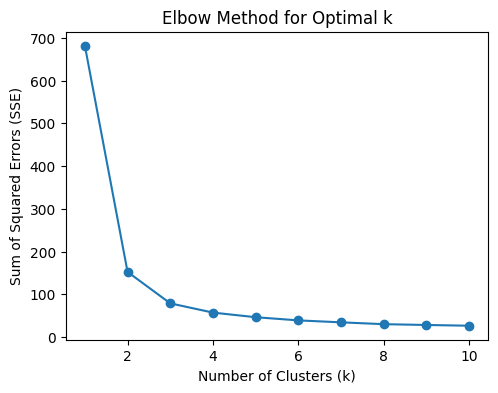

In [ ]:
# Finding the optimum number of clusters using the Elbow Method
sse = []  # Sum of Squared Errors

# Trying k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(12, 4))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')


**4. KMeans Clustering with Optimal K:**

In [ ]:
# Apply KMeans clustering with the selected k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**5. Visualize Clusters in 2D:**

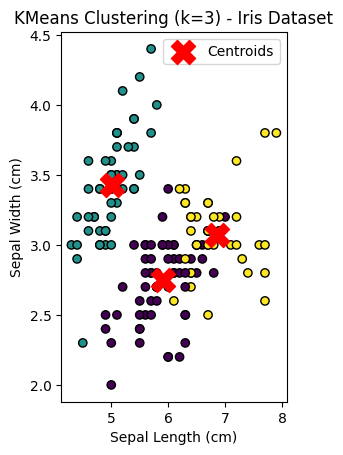

In [ ]:
# Visualize the clusters in 2D using the first two features
plt.subplot(1, 2, 2)
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering (k=3) - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


**6. Pair Plot for Detailed Feature Analysis:**

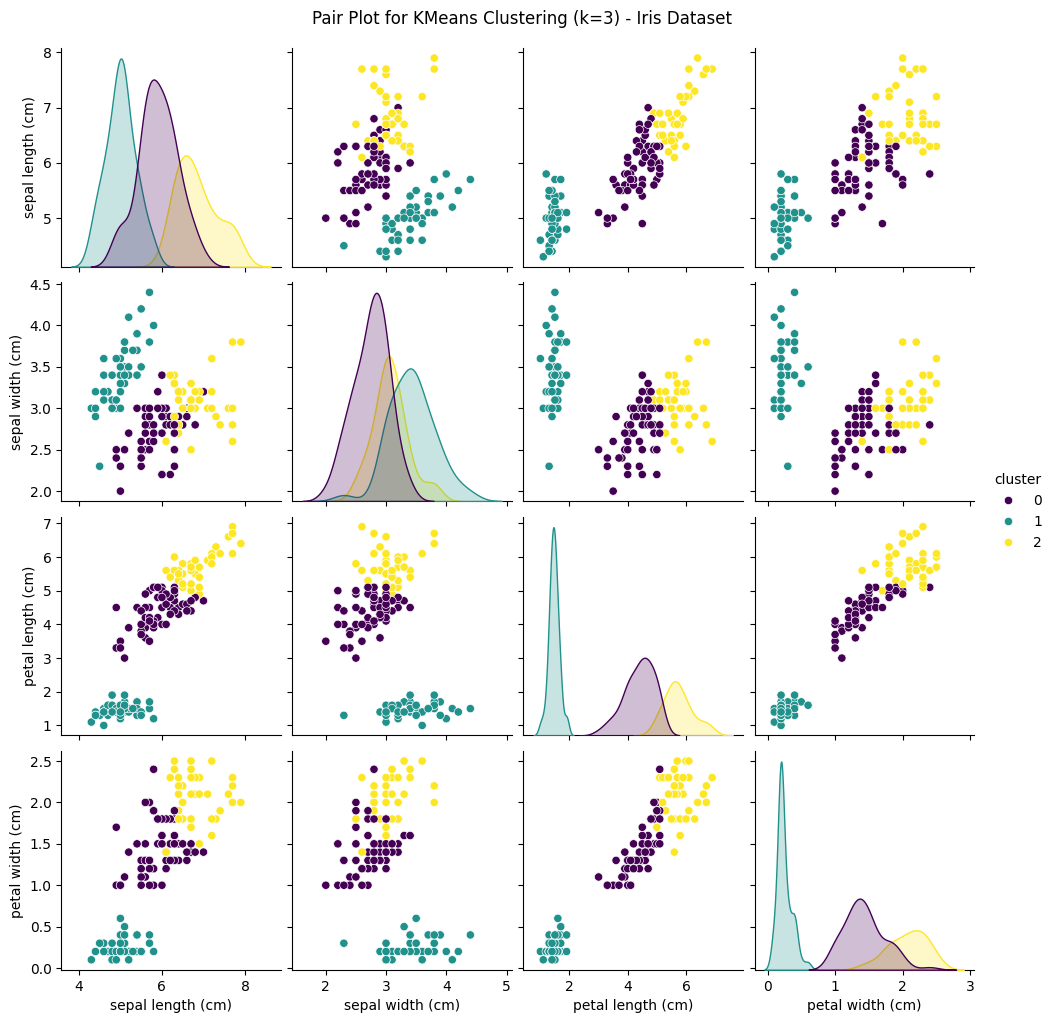

In [ ]:
# Pair plot for detailed feature analysis
sns.pairplot(data, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot for KMeans Clustering (k=3) - Iris Dataset', y=1.02)
plt.show()
